# It is a DataSet from tested.csv .We have to Predict how many passenger were Survived

In [221]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [222]:
titanic_data=pd.read_csv('tested.csv')

In [223]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [224]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [225]:
titanic_data.index

RangeIndex(start=0, stop=418, step=1)

In [226]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [227]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [228]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Explaining Dataset

survival : Survival 0 = No, 1 = Yes

pclass : Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd

sex : Sex

Age : Age in years

sibsp : Number of siblings / spouses aboard the Titanic

parch # of parents / children aboard the Titanic

ticket : Ticket number fare Passenger fare cabin Cabin number

embarked : Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

# Data Analysis

Import Seaborn for visually analysing the data

Find out how many survived vs Died using countplot method of seaboarn

<AxesSubplot:xlabel='Survived', ylabel='count'>

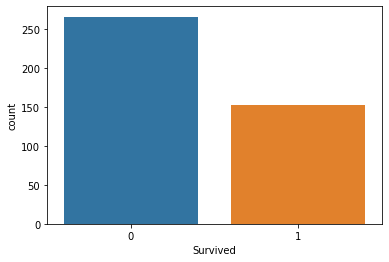

In [229]:
sns.countplot(x='Survived',data=titanic_data)

# Male vs Female Survival

<AxesSubplot:xlabel='Survived', ylabel='count'>

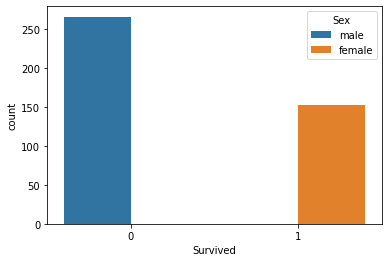

In [230]:
sns.countplot(x='Survived',data=titanic_data,hue='Sex')

In [231]:
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


In [232]:
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:>

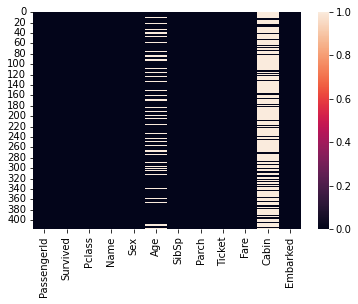

In [233]:
sns.heatmap(titanic_data.isna())

In [234]:
(titanic_data['Age'].isna().sum()/len(titanic_data['Age']))*100

20.574162679425836

In [235]:
(titanic_data['Fare'].isna().sum()/len(titanic_data['Fare']))*100

0.23923444976076555

In [236]:
(titanic_data['Cabin'].isna().sum()/len(titanic_data['Cabin']))*100

78.22966507177034

# find the distribution for the age column

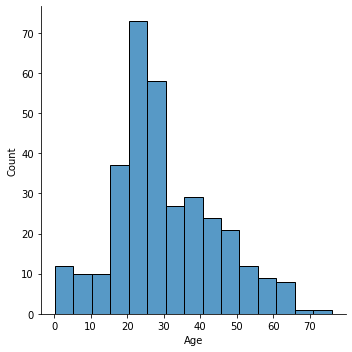

In [237]:
sns.displot(x='Age',data=titanic_data)

# Data Cleaning

Fill the missing values

we will fill the missing values for age. In order to fill missing values we use fillna method.

For now we will fill the missing age by taking average of all age

In [238]:
#fill age column

In [239]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)

In [240]:
titanic_data['Fare'].fillna(titanic_data['Fare'].mean(),inplace=True)

# We can verify that no more null data exist

we will examine data by isnull mehtod which will return nothing

In [241]:
#verify null value

In [242]:
titanic_data['Age'].isna().sum()

0

In [243]:
titanic_data['Fare'].isna().sum()

0

# Alternatively we will visualise the null value using heatmap

we will use heatmap method by passing only records which are null.

In [244]:
#visualize null values

<AxesSubplot:>

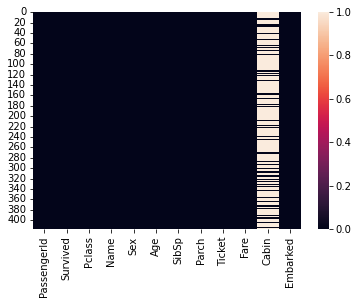

In [245]:
sns.heatmap(titanic_data.isna())

# We can see cabin column has a number of null values, as such we can not use it for prediction. Hence we will drop it

In [246]:
#Drop cabin column

In [247]:
titanic_data.drop('Cabin',axis=1,inplace=True)

In [248]:
#see the contents of the data

In [249]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


# Preaparing Data for Model

No we will require to convert all non-numerical columns to numeric. Please note this is required for feeding data into model. Lets see which columns are non numeric info describe method

In [250]:
#Check for the non-numeric column

In [251]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB


In [252]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

We can see, Name, Sex, Ticket and Embarked are non-numerical.It seems Name,Embarked and Ticket number are not useful for Machine Learning Prediction hence we will eventually drop it. For Now we would convert Sex Column to dummies numerical values****

In [253]:
#convert sex column to numerical values

In [254]:
gender=pd.get_dummies(titanic_data['Sex'],drop_first=True)

In [255]:
titanic_data['Gender']=gender

In [256]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0


In [257]:
#drop the columns which are not required

In [258]:
titanic_data.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [259]:
titanic_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,892,0,3,34.5,0,0,7.8292,1
1,893,1,3,47.0,1,0,7.0000,0
2,894,0,2,62.0,0,0,9.6875,1
3,895,0,3,27.0,0,0,8.6625,1
4,896,1,3,22.0,1,1,12.2875,0


In [260]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Gender         0
dtype: int64

In [261]:
#Seperate Dependent and Independent variables

In [262]:
x=titanic_data[['PassengerId','Pclass','Age','SibSp','Parch','Gender','Fare']]
y=titanic_data['Survived']

In [263]:
y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

# Data Modelling

Building Model using Logestic Regression

Build the model

In [264]:
#import train test split method

In [265]:
from sklearn.model_selection import train_test_split

In [266]:
#train test split

In [267]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [268]:
x_test.isna().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Gender         0
Fare           0
dtype: int64

In [269]:
#import Logistic  Regression

In [270]:
from sklearn.linear_model import LogisticRegression

In [271]:
#Fit  Logistic Regression 

In [272]:
lr=LogisticRegression()

In [273]:
lr.fit(x_train,y_train)

C:\Users\monda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [274]:
#predict

In [275]:
predict=lr.predict(x_test)

# Testing
See how our model is performing

In [276]:
#print confusion matrix 

In [277]:
from sklearn.metrics import confusion_matrix

In [278]:
pd.DataFrame(confusion_matrix(y_test,predict),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

,Predicted No,Predicted Yes
Actual No,92,0
Actual Yes,0,46


In [279]:
#import classification report

In [280]:
from sklearn.metrics import classification_report

In [281]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       1.00      1.00      1.00        46

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138



# The End